### 군집화 평가 - 실루엣(Silhouette) 분석 : Wine Quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('../data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine = df.iloc[:, :-1].values
wine_std = StandardScaler().fit_transform(wine)

kmeans = KMeans(n_clusters=2, random_state=2023, n_init='auto')
kmeans.fit(wine_std)

KMeans(n_clusters=2, n_init='auto', random_state=2023)

In [8]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
w_df = pd.DataFrame(wine_std, columns=df.columns[:-1])
w_df['target'] = df.quality.values
w_df['cluster'] = kmeans.labels_
w_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,0


In [10]:
# 실루엣 계수
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(wine_std, kmeans.labels_)
w_df['실루엣 계수'] = sil_samples
w_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target,cluster,실루엣 계수
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5,0,0.392132
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6,0,0.307664
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6,0,0.325471
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5,0,0.371328
1598,-1.332702,-1.216849,1.021999,0.752894,-0.434990,0.203223,-0.135861,-0.666057,0.511130,0.010924,0.541630,6,0,0.119338


In [11]:
# 실루엣 스코어
silhouette_score(wine_std, kmeans.labels_)

0.2068046222150101

In [12]:
w_df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.275069
1,0.104781


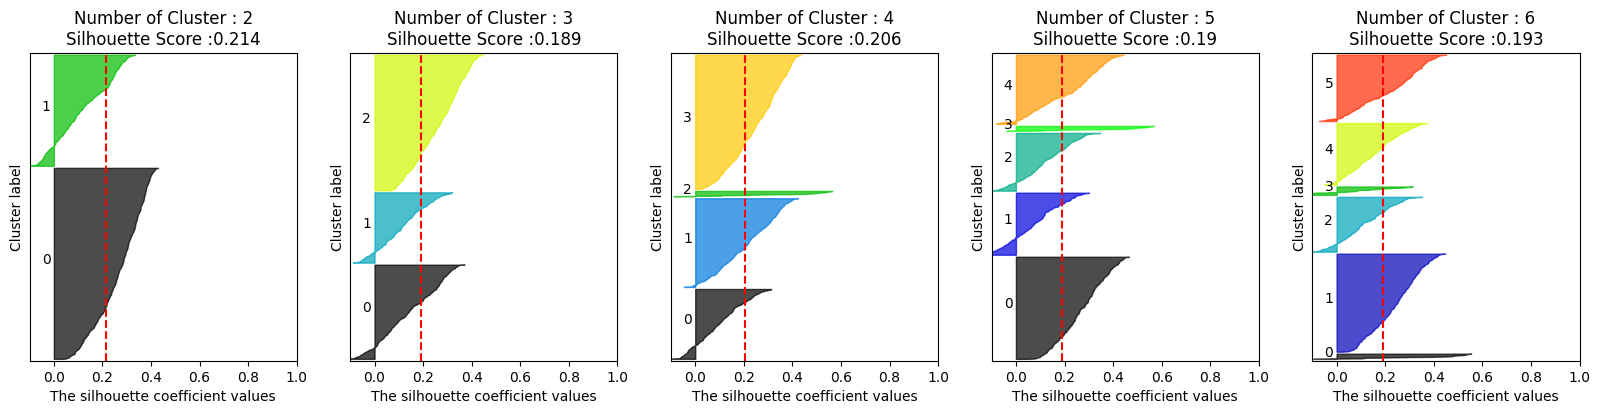

In [14]:
# 실루엣 스코어 시각화
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5,6], wine_std)

In [ ]:
# 두 분류로 군집화 하는 것이 실루엣 스코어가 제일 좋음